In [3]:
import pandas as pd
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
## Download data from github
!git clone https://github.com/JWeld/summerschool.git

In [4]:
dataset = pd.read_csv("summerschool/combined_data_7_sept.csv")

In [5]:
# Size of the dataframe
print(dataset.shape)

(12079, 36)


In [6]:
# Datatypes of the attributes
print(dataset.dtypes)

L.x                 float64
F.x                 float64
R.x                 float64
N.x                 float64
T.x                 float64
country              object
ID_fine              object
ID                   object
plot.x               object
div.x               float64
rich.x              float64
L.y                 float64
F.y                 float64
R.y                 float64
N.y                 float64
T.y                 float64
div.y               float64
rich.y              float64
n_nh4               float64
n_no3               float64
ID_site              object
latitude            float64
longitude           float64
survey_year           int64
code_country        float64
sum_canopy          float64
mean_temp           float64
mean_summer_temp    float64
mean_winter_temp    float64
mean_precip         float64
n                   float64
p                   float64
N.P                 float64
species_name         object
grp_tree_species     object
ID_siteplot         

In [12]:
import folium
folium_map = folium.Map(location=[ 10, 65],
                            zoom_start=2,
                            width='50%')

    # for each row in the data, add a cicle marker
for index, row in dataset.iterrows():
        # calculate net departures
        
        # add marker to the map
        folium.CircleMarker(location=(row["latitude"],row["longitude"])).add_to(folium_map)

folium_map

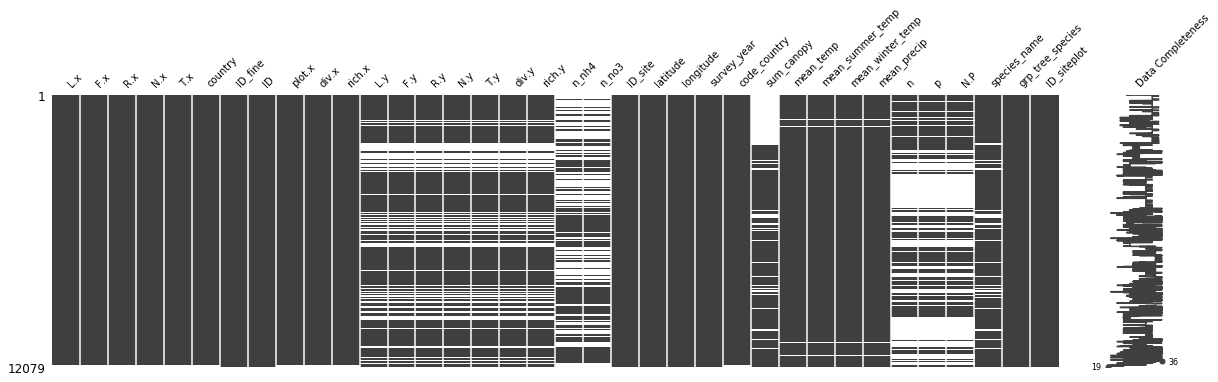

In [7]:
import missingno
missingno.matrix(dataset, figsize=(20,5), labels=True, fontsize=10)

In [179]:
data_sub=dataset

In [180]:
data_sub = data_sub.drop(columns=['n','p','N.P','n_nh4','n_no3' ,'country','species_name','ID_siteplot','ID_site','ID','ID_fine','plot.x','code_country'])
data_sub=data_sub[(data_sub['survey_year'] <= 2015) & (data_sub['survey_year'] > 2000) ]

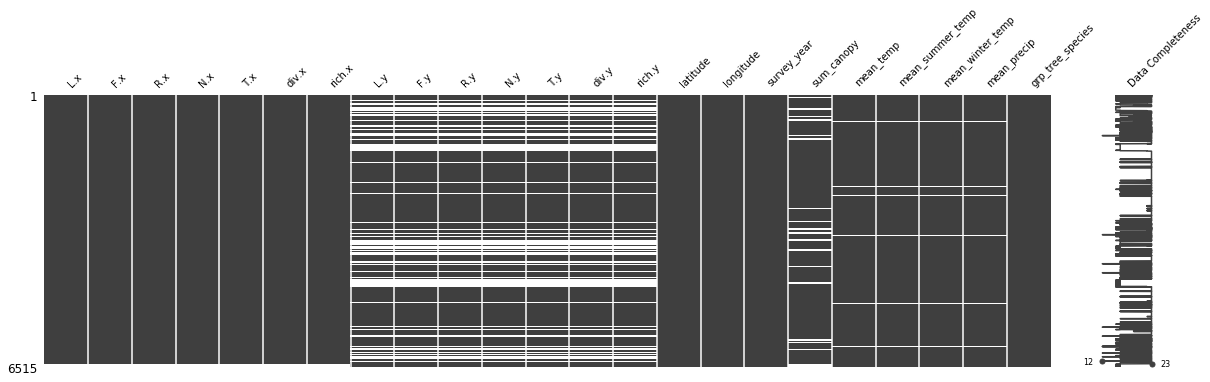

In [181]:
missingno.matrix(data_sub ,figsize=(20,5), labels=True, fontsize=10)

In [183]:
data_sub = data_sub.dropna()

In [184]:
data_sub['grp_tree_species'].value_counts()

broadleaves    2087
conifers       2052
Name: grp_tree_species, dtype: int64

In [194]:
data=data_sub

cols=data.columns 

data_corr = data.corr()

threshold = 0.3


corr_list = []

for i in range(0,data.shape[0]): #for 'size' features
    for j in range(i+1,22): #avoid repetition
        if (data_corr.iloc[i,j] >= threshold and data_corr.iloc[i,j] < 1) or (data_corr.iloc[i,j] < 0 and data_corr.iloc[i,j] <= -threshold):
            corr_list.append([data_corr.iloc[i,j],i,j]) #store correlation and columns index

#Sort to show higher ones first            
s_corr_list = sorted(corr_list,key=lambda x: -abs(x[0]))

#Print correlations and column names
for v,i,j in s_corr_list:
    print ("%s and %s = %.2f" % (cols[i],cols[j],v))

mean_temp and mean_winter_temp = 0.95
mean_temp and mean_summer_temp = 0.91
div.x and rich.x = 0.80
mean_summer_temp and mean_winter_temp = 0.75
R.y and T.y = 0.75
longitude and mean_winter_temp = -0.74
R.x and N.x = 0.70
div.y and rich.y = 0.70
latitude and mean_winter_temp = -0.66
latitude and longitude = 0.61
L.y and R.y = 0.59
L.y and T.y = 0.59
longitude and mean_temp = -0.56
latitude and mean_temp = -0.56
F.y and T.y = 0.55
R.x and rich.x = 0.55
F.x and T.x = 0.55
R.x and div.x = 0.54
L.y and F.y = 0.53
F.x and N.y = 0.51
N.x and div.x = 0.49
N.x and rich.x = 0.48
T.x and N.y = 0.48
mean_summer_temp and mean_precip = -0.48
T.x and mean_winter_temp = 0.45
T.x and latitude = -0.44
L.x and F.x = -0.44
F.y and R.y = 0.44
T.x and mean_temp = 0.41
L.y and N.y = -0.40
latitude and mean_precip = -0.39
N.y and mean_winter_temp = 0.38
L.x and N.y = -0.37
T.x and longitude = -0.36
rich.y and latitude = 0.36
N.y and latitude = -0.35
N.y and mean_temp = 0.34
T.x and rich.y = -0.34
latitude an

In [196]:
data_sub.grp_tree_species=data_sub.grp_tree_species.astype('category').cat.codes

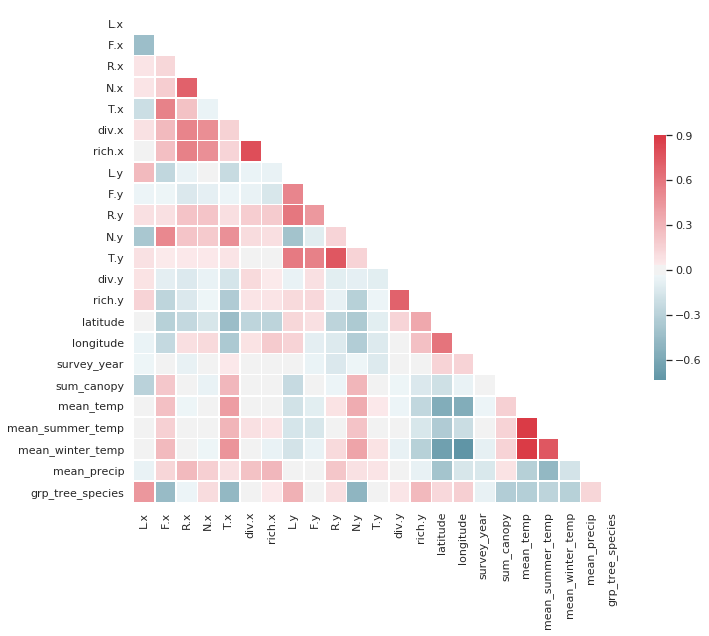

In [197]:
sns.set(style="white")


# Compute the correlation matrix
corr = data_sub.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [186]:
# Random Forest

(4139, 22)

In [185]:
X = data_sub.iloc[:, :-1].values
y = data_sub.iloc[:, -1].values

In [187]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# Encoding the Dependent Variable
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [30]:
#from imblearn.over_sampling import RandomOverSampler
#ros = RandomOverSampler(random_state=0)
#X_resampled, y_resampled = ros.fit_resample(X, y)

Using TensorFlow backend.


In [188]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [189]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [190]:
X

array([[ 4.217029e+00,  2.620515e+00,  2.470187e+00,  2.759222e+00, ...,  6.700000e+00,  1.560000e+01, -2.700000e+00,
         8.350000e+02],
       [ 4.435822e+00,  2.901700e+00,  2.621335e+00,  2.469820e+00, ...,  6.700000e+00,  1.560000e+01, -2.700000e+00,
         8.350000e+02],
       [ 3.268147e+00,  2.548202e+00,  2.943897e+00,  4.444470e+00, ...,  7.800000e+00,  1.640000e+01, -1.500000e+00,
         1.020000e+03],
       [ 4.787986e+00,  2.120141e-01,  1.505300e+00,  2.222615e+00, ...,  1.800000e+00,  9.700000e+00, -6.300000e+00,
         1.401000e+03],
       ...,
       [ 5.055556e+00,  1.111111e+00,  1.111111e+00,  2.444444e+00, ...,  8.100000e+00,  1.640000e+01, -5.000000e-01,
         6.290000e+02],
       [ 3.166667e+00,  4.166667e+00,  1.166667e+00,  2.500000e+00, ...,  9.200000e+00,  1.740000e+01,  7.000000e-01,
         7.110000e+02],
       [ 2.926247e+00,  4.349241e+00,  3.095445e+00,  3.822126e+00, ...,  2.400000e+00,  9.900000e+00, -5.300000e+00,
         1.140000e

In [191]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
rf.fit(X_train, y_train)

# Predicting the Test set results
y_pred = rf.predict(X_test)

# Making the Confusion Matrix
df = pd.DataFrame()
df['truth'] = y_test
df['predict'] = rf.predict(X_test)


# Cross-tabulate predictions
print(pd.crosstab(df['truth'], df['predict'], margins=True))


from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

predict    0    1   All
truth                  
0        515   22   537
1         21  477   498
All      536  499  1035


0.9584541062801932

In [192]:
bands = data_sub.columns

for b, imp in zip(bands, rf.feature_importances_):
    print('Band {b} importance: {imp}'.format(b=b, imp=imp))

Band L.x importance: 0.08735334810428236
Band F.x importance: 0.07815036793768268
Band R.x importance: 0.025627479307481563
Band N.x importance: 0.038899899502773845
Band T.x importance: 0.07388060787105521
Band div.x importance: 0.021956071495421177
Band rich.x importance: 0.02170353004753643
Band L.y importance: 0.041768877371393696
Band F.y importance: 0.031883769737527955
Band R.y importance: 0.03155907308733119
Band N.y importance: 0.1046459619466075
Band T.y importance: 0.023821203737916227
Band div.y importance: 0.018721064667002792
Band rich.y importance: 0.0223557210535416
Band latitude importance: 0.05151677841254578
Band longitude importance: 0.04240065279492394
Band survey_year importance: 0.010789590532104414
Band sum_canopy importance: 0.06285877278945322
Band mean_temp importance: 0.050603259818734946
Band mean_summer_temp importance: 0.046464979330090285
Band mean_winter_temp importance: 0.05813065474361936
Band mean_precip importance: 0.05490833571097378


In [34]:
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [35]:
seed = 7
scoring = 'accuracy'

In [37]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier(n_neighbors=5)))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier(n_estimators = 100)))
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_resampled, y_resampled, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/home/wascal/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/wascal/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/wascal/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/wascal/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/wascal/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

LR: 0.834224 (0.038091)
KNN: 0.787295 (0.053748)
CART: 0.806452 (0.055311)
RF: 0.893873 (0.051586)


In [ ]:
## Ann

In [177]:
X.shape

(583, 24)

In [175]:
X = data_sub.iloc[:, :-1].values
y = data_sub.iloc[:, -1].values

In [39]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# Encoding the Dependent Variable
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [40]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)

In [41]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.25,random_state = 0)

In [42]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [45]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 22, kernel_initializer = 'uniform', activation = 'relu', input_dim = 22))

# Adding the second hidden layer
classifier.add(Dense(units = 11, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))


# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 500)

Epoch 1/500
3130/3130 [==============================] - 0s 133us/step - loss: 0.5698 - acc: 0.7339
Epoch 2/500
3130/3130 [==============================] - 0s 65us/step - loss: 0.4430 - acc: 0.8712
Epoch 3/500
3130/3130 [==============================] - 0s 67us/step - loss: 0.3959 - acc: 0.8802
Epoch 4/500
3130/3130 [==============================] - 0s 66us/step - loss: 0.3615 - acc: 0.8911
Epoch 5/500
3130/3130 [==============================] - 0s 71us/step - loss: 0.3383 - acc: 0.8904
Epoch 6/500
3130/3130 [==============================] - 0s 68us/step - loss: 0.3177 - acc: 0.8968
Epoch 7/500
3130/3130 [==============================] - 0s 66us/step - loss: 0.3011 - acc: 0.9032
Epoch 8/500
3130/3130 [==============================] - 0s 67us/step - loss: 0.2871 - acc: 0.9042
Epoch 9/500
3130/3130 [==============================] - 0s 67us/step - loss: 0.2735 - acc: 0.9096
Epoch 10/500
3130/3130 [==============================] - 0s 67us/step - loss: 0.2658 - acc: 0.9137
Epoch 11

3130/3130 [==============================] - 0s 75us/step - loss: 0.1168 - acc: 0.9668
Epoch 84/500
3130/3130 [==============================] - 0s 77us/step - loss: 0.1151 - acc: 0.9658
Epoch 85/500
3130/3130 [==============================] - 0s 71us/step - loss: 0.1161 - acc: 0.9671
Epoch 86/500
3130/3130 [==============================] - 0s 70us/step - loss: 0.1200 - acc: 0.9620
Epoch 87/500
3130/3130 [==============================] - 0s 70us/step - loss: 0.1117 - acc: 0.9681
Epoch 88/500
3130/3130 [==============================] - 0s 71us/step - loss: 0.1125 - acc: 0.9687
Epoch 89/500
3130/3130 [==============================] - 0s 75us/step - loss: 0.1146 - acc: 0.9668
Epoch 90/500
3130/3130 [==============================] - 0s 75us/step - loss: 0.1113 - acc: 0.9696
Epoch 91/500
3130/3130 [==============================] - 0s 75us/step - loss: 0.1139 - acc: 0.9681
Epoch 92/500
3130/3130 [==============================] - 0s 76us/step - loss: 0.1174 - acc: 0.9658
Epoch 93/500


3130/3130 [==============================] - 0s 83us/step - loss: 0.0809 - acc: 0.9796
Epoch 246/500
3130/3130 [==============================] - 0s 81us/step - loss: 0.0761 - acc: 0.9827
Epoch 247/500
3130/3130 [==============================] - 0s 83us/step - loss: 0.0756 - acc: 0.9831
Epoch 248/500
3130/3130 [==============================] - 0s 70us/step - loss: 0.0752 - acc: 0.9831
Epoch 249/500
3130/3130 [==============================] - 0s 66us/step - loss: 0.1006 - acc: 0.9748
Epoch 250/500
3130/3130 [==============================] - 0s 65us/step - loss: 0.0956 - acc: 0.9754
Epoch 251/500
3130/3130 [==============================] - 0s 72us/step - loss: 0.0890 - acc: 0.9780
Epoch 252/500
3130/3130 [==============================] - 0s 75us/step - loss: 0.0795 - acc: 0.9815
Epoch 253/500
3130/3130 [==============================] - 0s 79us/step - loss: 0.0749 - acc: 0.9834
Epoch 254/500
3130/3130 [==============================] - 0s 79us/step - loss: 0.0740 - acc: 0.9837
Epoc

3130/3130 [==============================] - 0s 78us/step - loss: 0.0698 - acc: 0.9847
Epoch 408/500
3130/3130 [==============================] - 0s 88us/step - loss: 0.0683 - acc: 0.9850
Epoch 409/500
3130/3130 [==============================] - 0s 86us/step - loss: 0.0805 - acc: 0.9831
Epoch 410/500
3130/3130 [==============================] - 0s 84us/step - loss: 0.0725 - acc: 0.9834
Epoch 411/500
3130/3130 [==============================] - 0s 75us/step - loss: 0.0743 - acc: 0.9824
Epoch 412/500
3130/3130 [==============================] - 0s 75us/step - loss: 0.0852 - acc: 0.9792
Epoch 413/500
3130/3130 [==============================] - 0s 77us/step - loss: 0.0834 - acc: 0.9802
Epoch 414/500
3130/3130 [==============================] - 0s 77us/step - loss: 0.0692 - acc: 0.9843
Epoch 415/500
3130/3130 [==============================] - 0s 77us/step - loss: 0.0679 - acc: 0.9850
Epoch 416/500
3130/3130 [==============================] - 0s 78us/step - loss: 0.0679 - acc: 0.9847
Epoc

In [173]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[66, 10],
       [ 7, 69]])

In [174]:
accuracy_score(y_test, y_pred)

0.8881578947368421

In [100]:

# baseline model
def create_baseline():

   # Initialising the ANN
    classifier = Sequential()

# Adding the input layer and the first hidden layer
    classifier.add(Dense(units = 24, kernel_initializer = 'uniform', activation = 'relu', input_dim = 24))

# Adding the second hidden layer
    classifier.add(Dense(units = 12, kernel_initializer = 'uniform', activation = 'relu'))
    
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))


# Adding the output layer
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [101]:
from sklearn.model_selection import StratifiedKFold

# evaluate model with standardized dataset
estimator = KerasClassifier(build_fn=create_baseline, epochs=200, batch_size=10, verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(estimator, X_resampled, y_resampled, cv=kfold)
print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Results: 89.47% (3.36%)
